# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ades Tikaningsih
- **Email:** adestika123@gmail.com
- **ID Dicoding:** adestikaningsih

## Menentukan Pertanyaan Bisnis

- Bagaimana suhu dan kelembaban mempengaruhi penyewaan sepeda selama tahun 2011-2012?
- Bagaimana pola musiman dan hari libur memengaruhi jumlah penyewaan sepeda antara tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
day.shape

(731, 16)

In [3]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [60]:
hour.shape

(17379, 21)

**Insight:**
- Dataset day.csv memuat data harian (day-level data) yang terdiri dari 731 baris dan 16 kolom
- Dataset hour.csv memuat data per jam (hour-level data) yang terdiri dari 17.379 baris dan 21 kolom
- Dataset day berisi informasi ringkasan harian, sedangkan dataset hour lebih granular dengan data pada tingkat jam, yang dapat memberikan analisis yang lebih detail mengenai pola penggunaan sepeda sepanjang hari.

### Assessing Data

In [4]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


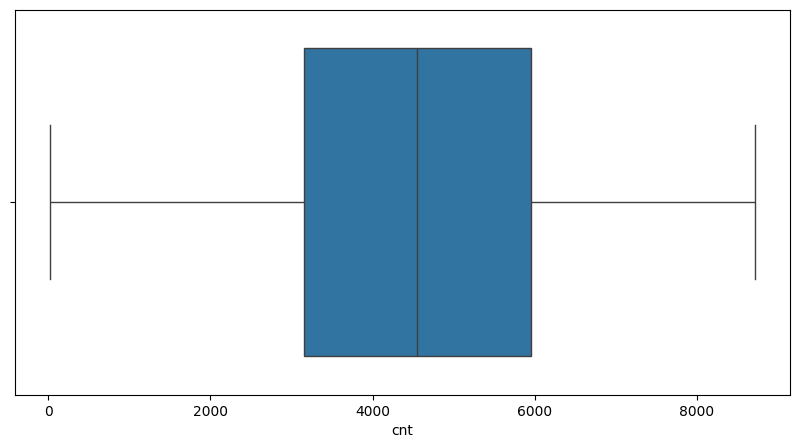

In [6]:
# Mendefinisikan outlier

plt.figure(figsize=(10,5))
sns.boxplot(x=day['cnt'])
plt.show()


**Insight:**
- "Day" data tidak memiliki missing value
- Beberapa kolom seperti season, yr, mnth, dan kolom lainnya adalah bertipe int64, sementara kolom seperti temp, atemp, hum, dan windspeed bertipe float64. Kolom dteday bertipe object, kemungkinan merupakan kolom yang berisi tanggal.
- data terlihat konsisten tanpa ada nilai ekstrim yang mencolok, sehingga dataset ini dapat digunakan untuk analisis lebih lanjut tanpa perlunya perlakuan khusus terhadap nilai outlier.

In [7]:
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [8]:
print("Jumlah duplikasi: ",hour.duplicated().sum())


Jumlah duplikasi:  0


In [9]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


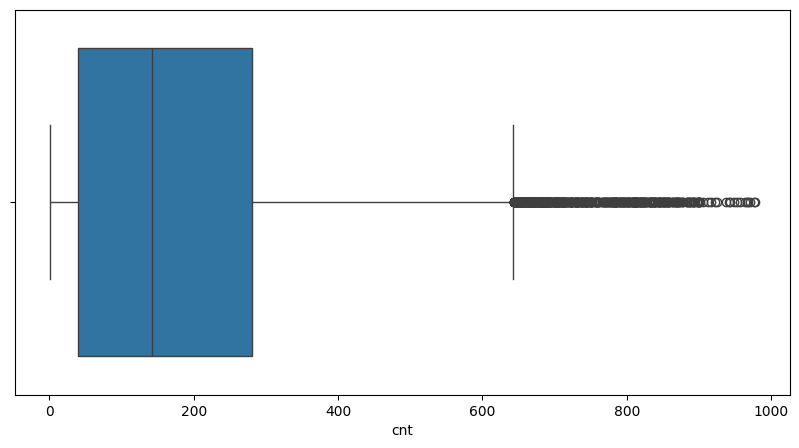

In [10]:
# Mendefinisikan outlier

plt.figure(figsize=(10,5))
sns.boxplot(x=hour['cnt'])
plt.show()


In [11]:
z_score = zscore(hour['cnt'])
outliers = hour[np.abs(z_score) > 3]
print(f"jumlah outliers : {len(outliers)}")


jumlah outliers : 244


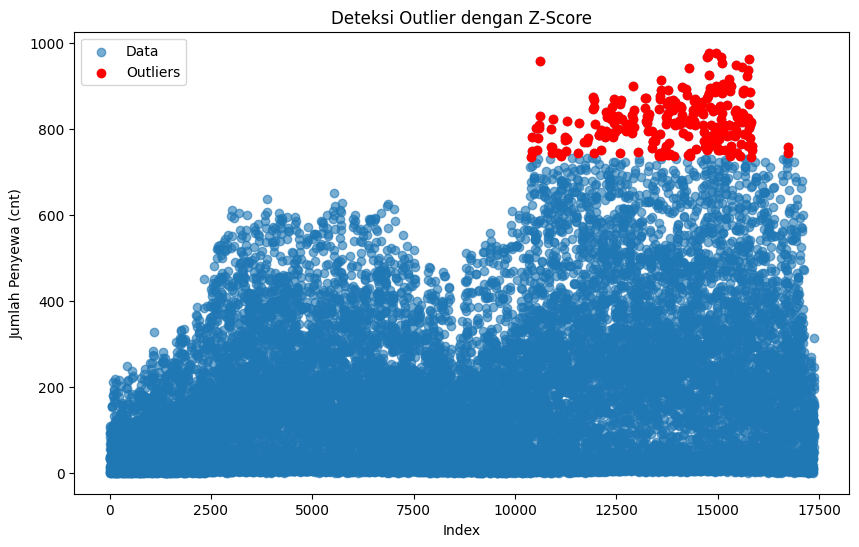

In [12]:
import matplotlib.pyplot as plt

# Scatter plot untuk data cnt
plt.figure(figsize=(10, 6))
plt.scatter(range(len(hour['cnt'])), hour['cnt'], label='Data', alpha=0.6)
plt.scatter(outliers.index, outliers['cnt'], color='red', label='Outliers')
plt.legend()
plt.title('Deteksi Outlier dengan Z-Score')
plt.xlabel('Index')
plt.ylabel('Jumlah Penyewa (cnt)')
plt.show()


**Insight:**
- data "hour" tidak ada missing values dalam dataset untuk semua kolom.
- Boxplot yang dibuat dari kolom cnt menunjukkan adanya beberapa outlier di ujung kanan distribusi. Ini menandakan ada data jumlah penyewaan yang cukup tinggi di luar nilai normal atau umum.
- Proses selanjutnya menggunakan Z-Score untuk mendeteksi outlier. Ditetapkan threshold Z-Score > 3, dan ditemukan bahwa ada 244 data yang dianggap sebagai outlier.

### Cleaning Data

In [13]:
# mendapatkan index baris yang bukan outlier
non_outliers_index = hour[np.abs(z_score)<=3].index
hour_no_outliers = hour.loc[non_outliers_index]

print(f"Jumlah data setelah menghilangkan outliers: {len(hour_no_outliers)}")
print(f"Jumlah data yang dihilangkan sebagai outliers: {len(hour) - len(hour_no_outliers)}")

# Menampilkan beberapa baris pertama dari DataFrame tanpa outliers
hour_no_outliers.head()


Jumlah data setelah menghilangkan outliers: 17135
Jumlah data yang dihilangkan sebagai outliers: 244


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Setelah penghapusan outliers, data yang tersisa berjumlah 17.135 data point dari total awal.
- Beberapa kolom seperti temp, hum, dan windspeed tetap terlihat normal dan berada dalam rentang yang wajar setelah outliers dihapus.
- Penghapusan outliers membantu mendapatkan distribusi yang lebih bersih dan lebih wajar dalam data yang melibatkan variabel seperti kecepatan angin (windspeed) dan kelembaban (hum), yang tampak tidak ada nilai ekstrim lagi setelah pemrosesan.


In [14]:

# Mengubah kolom 'dteday' menjadi tipe datetime
hour_no_outliers['dteday'] = pd.to_datetime(hour_no_outliers['dteday'])

# Memeriksa tipe data
print(hour_no_outliers.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [15]:
# ubah dteday menjadi datetime
day['dteday'] = pd.to_datetime(day['dteday'])
print(day.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- statistik deskriptif:•	Kolom cnt (jumlah total sepeda yang dipinjam per hari) memiliki nilai rata-rata sebesar 4504 dengan nilai maksimum 8714 dan minimum 22.
- Distribusi nilai untuk kolom temp, hum, dan windspeed menunjukkan variasi yang cukup kecil, yang diindikasikan dari rentang standar deviasi dan min-max yang tidak terlalu besar.

In [14]:
hour_no_outliers.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17135.00000,17135,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000
mean,8616.41033,2011-12-30 02:24:27.732710656,2.494718,0.495477,6.522264,11.485848,0.029180,3.003793,0.678669,1.428246,0.494417,0.473547,0.628875,0.189893,34.818267,145.672250,180.490516
min,1.00000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4284.50000,2011-07-02 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,33.000000,39.000000
50%,8568.00000,2011-12-28 00:00:00,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,16.000000,113.000000,139.000000
75%,12916.50000,2012-06-27 00:00:00,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,47.000000,214.000000,273.000000
max,17379.00000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,712.000000,733.000000
std,5011.06776,NaN,1.109381,0.499994,3.451943,6.931725,0.168316,2.013274,0.467001,0.640886,0.192284,0.171711,0.192907,0.122455,48.728987,135.894681,166.101082


**Insight:**
- Min, Max, Mean, Std Dev: Untuk setiap kolom dihitung statistik deskriptifnya. Misalnya, kolom temp memiliki nilai rata-rata 0.494417, dengan standar deviasi 0.192284, yang menunjukkan variasi suhu dalam dataset.
- Kolom holiday dan workingday memiliki mean yang sangat rendah, menandakan bahwa sebagian besar data berasal dari hari non-libur atau hari kerja.
- Kolom cnt (total pengguna) memiliki nilai minimum 1 dan nilai maksimum 733 dengan mean 180.49, menunjukkan variasi yang besar dalam jumlah pengguna dalam dataset ini.
- Distribusi data hr (jam) berkisar antara 0 hingga 23, yang menunjukkan bahwa data diambil secara konsisten untuk setiap jam dalam sehari.
- weathersit memiliki rata-rata 1.42, yang menunjukkan bahwa sebagian besar waktu cuaca berada dalam kategori yang lebih baik (nilai 1 untuk kondisi cerah atau sedikit mendung).



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana suhu dan kelembaban mempengaruhi penyewaan sepeda selama tahun 2011-2012?

In [37]:
correlations = day[['temp','hum','cnt']].corr()

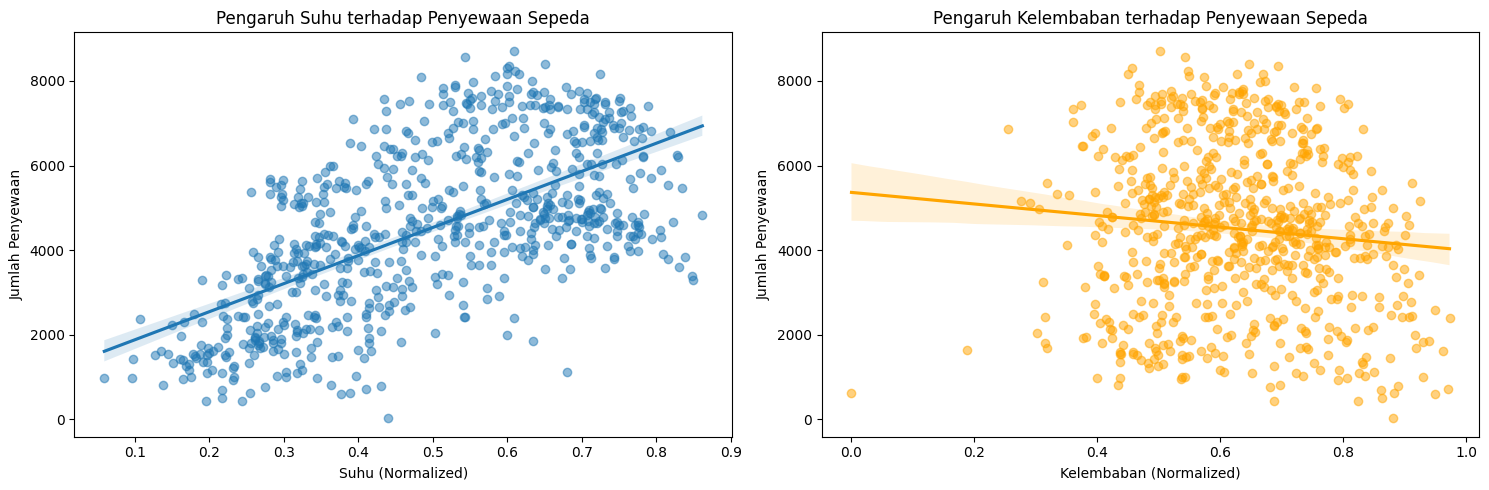

,temp,hum,cnt
temp,1.000000,0.126963,0.627494
hum,0.126963,1.000000,-0.100659
cnt,0.627494,-0.100659,1.000000


In [41]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
# Plot: Suhu vs Jumlah Penyewaan Sepeda
sns.regplot(ax=axes[0], x='temp', y='cnt', data=day, scatter_kws={'alpha': 0.5})
axes[0].set_title('Pengaruh Suhu terhadap Penyewaan Sepeda')
axes[0].set_xlabel('Suhu (Normalized)')
axes[0].set_ylabel('Jumlah Penyewaan')

# Plot: Kelembaban vs Jumlah Penyewaan Sepeda
sns.regplot(ax=axes[1], x='hum', y='cnt', data=day, scatter_kws={'alpha': 0.5}, color='orange')
axes[1].set_title('Pengaruh Kelembaban terhadap Penyewaan Sepeda')
axes[1].set_xlabel('Kelembaban (Normalized)')
axes[1].set_ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

correlations

**Insight:**
- Pengaruh Suhu: Terdapat hubungan positif yang moderat antara suhu dan jumlah penyewaan sepeda (dengan nilai korelasi 0.627). Ini menunjukkan bahwa ketika suhu meningkat, jumlah penyewaan sepeda cenderung meningkat. Oleh karena itu, suhu memiliki pengaruh signifikan terhadap penyewaan sepeda selama periode tersebut.
- Pengaruh Kelembaban: Kelembaban memiliki pengaruh yang sangat kecil dan negatif terhadap penyewaan sepeda (dengan nilai korelasi -0.101). Hal ini menunjukkan bahwa ketika kelembaban meningkat, jumlah penyewaan sepeda sedikit menurun, tetapi pengaruh ini tidak terlalu signifikan.
- Hubungan antara Suhu dan Kelembaban: Korelasi antara suhu dan kelembaban adalah 0.127, yang menunjukkan hubungan yang sangat lemah antara keduanya. Ini berarti bahwa perubahan suhu tidak banyak mempengaruhi kelembaban secara langsung, dan sebaliknya.


### Pertanyaan 2: Bagaimana pola musiman dan hari libur memengaruhi jumlah penyewaan sepeda antara tahun 2011 dan 2012?

In [17]:
hour_no_outliers['year'] = hour_no_outliers['dteday'].dt.year
hour_no_outliers['month'] = hour_no_outliers['dteday'].dt.month
hour_no_outliers['day_name'] = hour_no_outliers['dteday'].dt.day_name()

In [18]:
monthly_trend = hour_no_outliers.groupby('month')['cnt'].mean()
holiday_trend = hour_no_outliers.groupby('holiday')['cnt'].mean()

<ipython-input-19-3d66c799ac7e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=holiday_trend.index, y=holiday_trend.values, palette='pastel')


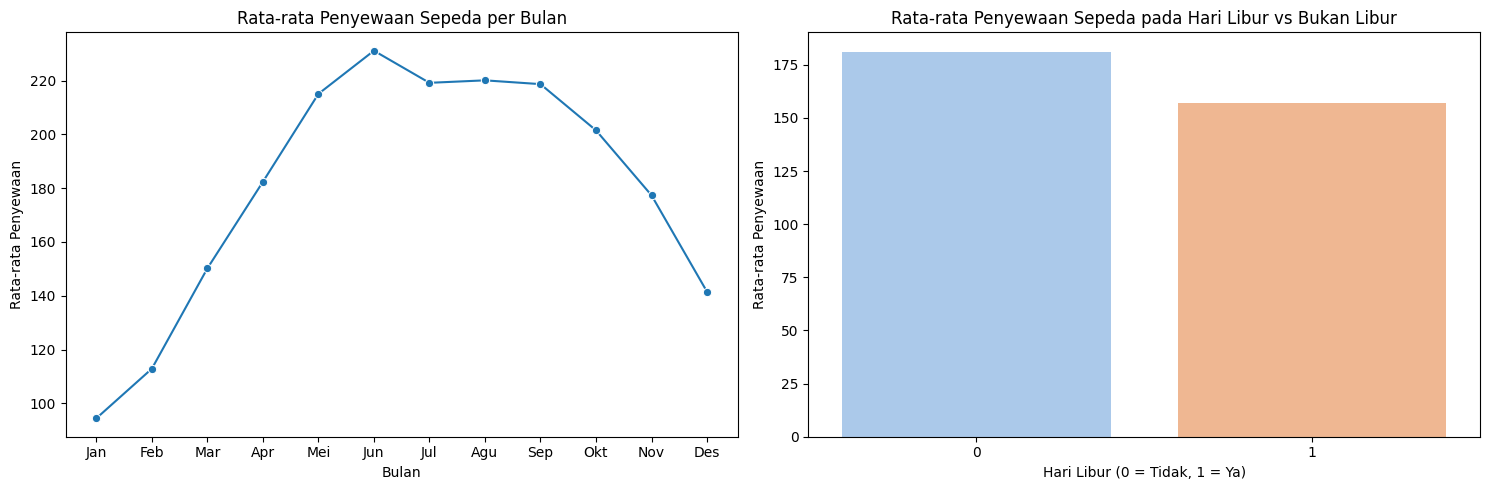

(month
 1      94.424773
 2     112.865026
 3     150.157426
 4     182.337544
 5     215.032698
 6     231.081863
 7     219.147665
 8     220.065688
 9     218.658009
 10    201.482537
 11    177.335421
 12    141.481431
 Name: cnt, dtype: float64,
 holiday
 0    181.200481
 1    156.870000
 Name: cnt, dtype: float64)

In [19]:
# Visualize Seasonal Trends (Monthly)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot: Rata-rata Penyewaan Sepeda per Bulan
sns.lineplot(ax=axes[0], x=monthly_trend.index, y=monthly_trend.values, marker='o')
axes[0].set_title('Rata-rata Penyewaan Sepeda per Bulan')
axes[0].set_xlabel('Bulan')
axes[0].set_ylabel('Rata-rata Penyewaan')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

# Plot: Penyewaan Berdasarkan Hari Libur (0 = Bukan Libur, 1 = Libur)
sns.barplot(ax=axes[1], x=holiday_trend.index, y=holiday_trend.values, palette='pastel')
axes[1].set_title('Rata-rata Penyewaan Sepeda pada Hari Libur vs Bukan Libur')
axes[1].set_xlabel('Hari Libur (0 = Tidak, 1 = Ya)')
axes[1].set_ylabel('Rata-rata Penyewaan')

plt.tight_layout()
plt.show()

# Average rentals per month and for holiday vs non-holiday
monthly_trend, holiday_trend

**Insight:**
- Pola Musiman (Bulanan): Terdapat fluktuasi rata-rata penyewaan sepeda per bulan selama tahun 2011-2012 Puncak penyewaan terjadi pada bulan Juni dan Juli dengan nilai rata-rata lebih dari 230 penyewaan. Penyewaan sepeda menurun drastis setelah Agustus, dengan penurunan paling tajam pada bulan Desember yang hanya mencapai sekitar 94 penyewaan.


- Hari Libur:Dari grafik kedua, diperlihatkan bahwa rata-rata penyewaan sepeda pada hari libur lebih rendah (156 penyewaan) dibandingkan dengan hari biasa (181 penyewaan). Ini menunjukkan bahwa hari libur tidak meningkatkan jumlah penyewaan sepeda, yang mungkin disebabkan oleh kebiasaan masyarakat yang cenderung melakukan aktivitas lain atau beristirahat pada hari libur.

Secara keseluruhan, pola musiman sangat memengaruhi jumlah penyewaan sepeda, dengan puncaknya pada musim panas, sementara hari libur cenderung tidak meningkatkan penyewaan dan bahkan menunjukkan sedikit penurunan pada hari-hari libur dibandingkan hari kerja.

## Analisis Lanjutan (Opsional)

### Pola Penyewaan berdasarkan Jam Hipotesis: Ada jam-jam sibuk tertentu, seperti pagi (07:00-09:00) dan sore (17:00-19:00) yang menunjukkan lonjakan penyewaan sepeda terkait mobilitas kerja.

In [20]:
# Buat fitur baru untuk jam tertentu dalam sehari
hour_no_outliers['hour'] = hour_no_outliers['dteday'].dt.hour

In [21]:
# Kelompokkan berdasarkan jam dan hitung rata-rata sewa
hourly_trend = hour_no_outliers.groupby('hr')['cnt'].mean()

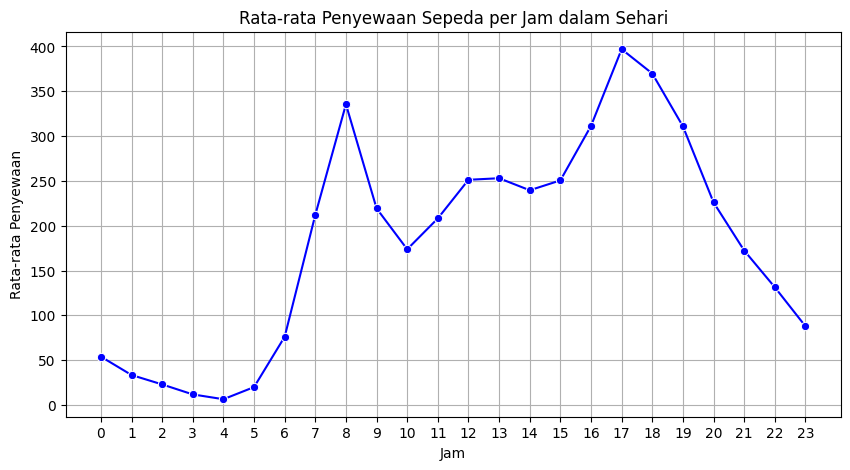

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     335.500000
9     219.309491
10    173.668501
11    208.143054
12    251.224828
13    252.965659
14    239.548831
15    250.548077
16    311.337449
17    396.935897
18    369.841693
19    310.929849
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [26]:
# Visualisasikan tren sewa per jam dengan plot garis
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker='o', linestyle='-', color='b')

# Set judul dan label
plt.title('Rata-rata Penyewaan Sepeda per Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))  # Set tick untuk setiap jam di sumbu x
plt.grid(True)

# Tampilkan grafik
plt.show()
print(hourly_trend)

**Insight:**
- Pola Rata-rata Penyewaan: Penyewaan mulai meningkat secara signifikan dari jam 6 pagi hingga mencapai puncak pertama pada jam 8 pagi. Setelah itu, meskipun menurun sedikit, penyewaan tetap stabil hingga akhirnya mengalami lonjakan kedua pada jam 5 hingga 7 malam. Setelah jam 7 malam, jumlah penyewaan kembali menurun drastis.
- Terdapat penurunan signifikan dalam jumlah penyewaan selama jam malam dan dini hari, terutama antara jam 12 malam hingga 5 pagi, yang dapat diasumsikan sebagai waktu ketika orang lebih jarang menyewa sepeda.

### Pertanyaan : Apakah kecepatan angin mempengaruhi keputusan orang untuk menyewa sepeda?

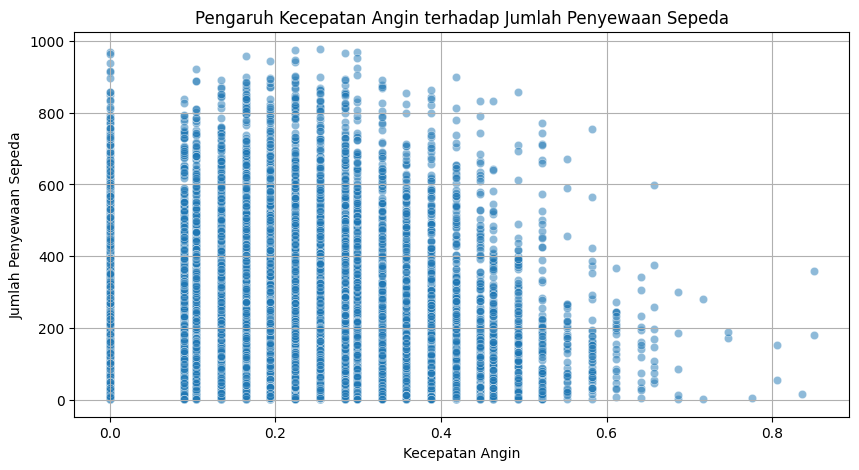

0.09323378392612532

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=hour['windspeed'], y=hour['cnt'], alpha=0.5)
# Set plot titles and labels
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.show()

# Opsional: Hitung dan tampilkan korelasi antara kecepatan angin dan cnt
correlation = hour['windspeed'].corr(hour['cnt'])
correlation

**Insight**
- Hubungan antara kecepatan angin dan jumlah penyewaan sepeda sangat lemah, dengan nilai korelasi sebesar 0.093. Ini menunjukkan bahwa kecepatan angin bukan faktor yang signifikan dalam mempengaruhi jumlah penyewaan sepeda.
- Sebagian besar penyewaan sepeda terjadi saat kecepatan angin rendah (di bawah 0.4), dan semakin tinggi kecepatan angin, jumlah penyewaan sepeda cenderung menurun. Namun, penurunan ini tidak cukup kuat untuk menunjukkan bahwa kecepatan angin adalah penentu utama dalam keputusan penyewaan.

### Clustering menggunakan binning atau grouping untuk melihat tren sewa berdasarkan kategori waktu.

In [16]:
# Buat kategori waktu berdasarkan jam
hour_no_outliers['time_category'] = pd.cut(hour_no_outliers['hr'],
                                    bins=[-1, 6, 12, 18, 24],
                                    labels=['Night', 'Morning', 'Afternoon', 'Evening'])

# Tampilkan contoh hasil binning
print(hour_no_outliers[['hr', 'time_category']].head())

   hr time_category
0   0         Night
1   1         Night
2   2         Night
3   3         Night
4   4         Night


Bagi jam menjadi 4 kategori: Night (Malam), Morning (Pagi), Afternoon (Siang), dan Evening (Sore).

<ipython-input-17-657a31c3c0f9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rent_per_time_category = hour_no_outliers.groupby('time_category')['cnt'].mean()
<ipython-input-17-657a31c3c0f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rent_per_time_category.index, y=avg_rent_per_time_category.values, palette='Blues')


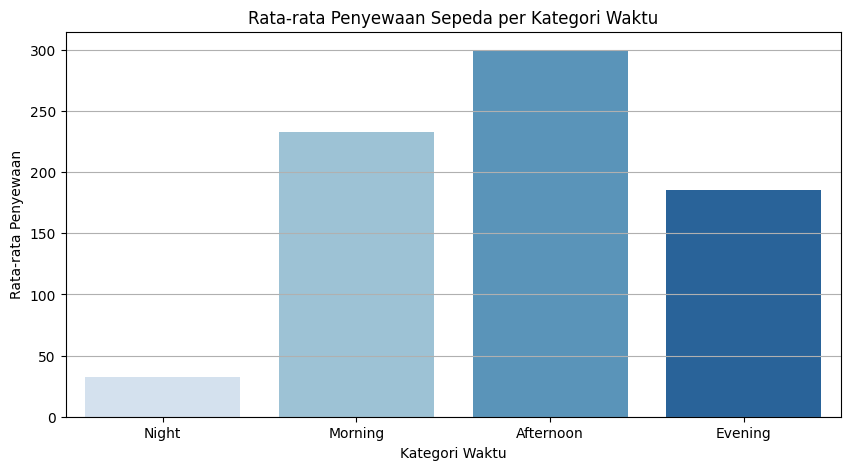

In [17]:
# Hitung rata-rata penyewaan untuk setiap kategori waktu
avg_rent_per_time_category = hour_no_outliers.groupby('time_category')['cnt'].mean()

# Visualisasi dengan bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rent_per_time_category.index, y=avg_rent_per_time_category.values, palette='Blues')

# Set judul dan label
plt.title('Rata-rata Penyewaan Sepeda per Kategori Waktu')
plt.xlabel('Kategori Waktu')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y')

# Tampilkan plot
plt.show()

**Insight**
- Pengelompokan Berdasarkan Kategori Waktu: Waktu dalam dataset dipecah menjadi 4 kategori yaitu Night, Morning, Afternoon, dan Evening berdasarkan jam.
- Penyewaan sepeda paling rendah terjadi pada kategori Night.
Penyewaan sepeda mengalami peningkatan yang signifikan di Morning.
Penyewaan sepeda tertinggi terjadi pada Afternoon.
Pada Evening, penyewaan menurun namun tetap lebih tinggi dibandingkan Night.
- Kategori Afternoon menonjol sebagai waktu penyewaan tertinggi, yang dapat memberikan insight bahwa pengguna lebih cenderung menyewa sepeda di siang hari daripada malam atau pagi hari.


## Conclusion

- Conclution pertanyaan 1 : Suhu memiliki pengaruh positif yang signifikan terhadap penyewaan sepeda, sementara kelembaban hanya memiliki pengaruh negatif yang minimal. Peningkatan suhu cenderung meningkatkan jumlah penyewaan sepeda, sedangkan perubahan kelembaban tidak berdampak besar pada penyewaan. Kedua faktor ini (suhu dan kelembaban) sendiri tidak memiliki hubungan yang kuat satu sama lain dalam konteks pengaruhnya terhadap penyewaan sepeda selama periode 2011-2012.
- Conclution pertanyaan 2 : Pola musiman dan hari libur memiliki pengaruh yang berlawanan terhadap jumlah penyewaan sepeda antara tahun 2011 dan 2012. Penyewaan sepeda mencapai puncaknya pada bulan-bulan musim panas (Juni dan Juli) dan menurun drastis di musim dingin (Desember). Namun, di luar dugaan, hari libur justru mengurangi jumlah penyewaan sepeda dibandingkan hari biasa, kemungkinan karena orang lebih memilih aktivitas lain atau beristirahat pada hari libur.

- Conclution Analisis Lanjutan 1 : Pola penyewaan sepeda menunjukkan korelasi kuat dengan ritme aktivitas harian masyarakat, terutama terkait mobilitas kerja. Terdapat dua puncak penyewaan yang jelas, yaitu pada pagi hari (07:00-09:00) dan sore hari (17:00-19:00), yang bertepatan dengan waktu berangkat dan pulang kerja. Penyewaan cenderung stabil di siang hari namun menurun drastis pada malam hingga dini hari. Hal ini mengindikasikan bahwa layanan penyewaan sepeda terutama digunakan sebagai sarana transportasi untuk kegiatan rutin sehari-hari, dengan penggunaan paling tinggi saat jam sibuk dan paling rendah saat kebanyakan orang beristirahat.
- Conclution Analisis Lanjutan 2 : Kecepatan angin tidak memiliki pengaruh yang signifikan terhadap keputusan orang untuk menyewa sepeda. Meskipun ada sedikit kecenderungan penurunan penyewaan saat angin kencang, faktor ini bukan penentu utama dalam keputusan penyewaan sepeda.
- Tren sewa berdasarkan kategori waktu: tren penyewaan sepeda bervariasi sepanjang hari, dengan siang hari (Afternoon) menjadi waktu paling populer untuk penyewaan.